In [1]:
# Nama: Gabril Hozanna
# Kelas: 3B TKJ
# NIM: 42517042

In [2]:
import pandas as pd
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import numpy as np 
from sklearn import linear_model

In [3]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [4]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [5]:
len(df)

55

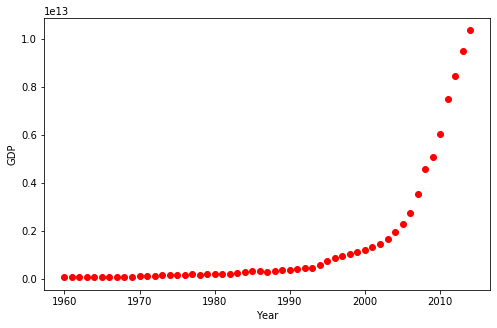

In [6]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data,y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [7]:
#hasil visualisasi dari dataset bentuknya eksponensial
#buat module/fungsi
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1+np.exp(-beta_1*(x-beta_2)))
    return y

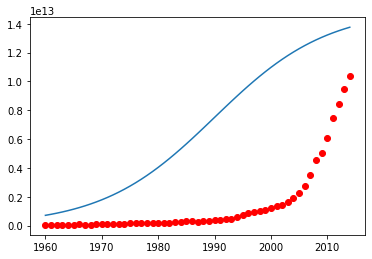

In [8]:
#testing model
beta_1 = 0.1
beta_2 = 1990.0

#logistic function
y_pred = sigmoid(x_data, beta_1, beta_2)

#plot initial prediction against datapoint
plt.plot(x_data,y_pred*15000000000000)
plt.plot(x_data,y_data,'ro')
plt.show()

In [9]:
#normalisasi data
x_norm = x_data/max(x_data)
y_norm = y_data/max(y_data)

In [10]:
#menentukan nilai parameter
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.451711, beta_2 = 0.997207


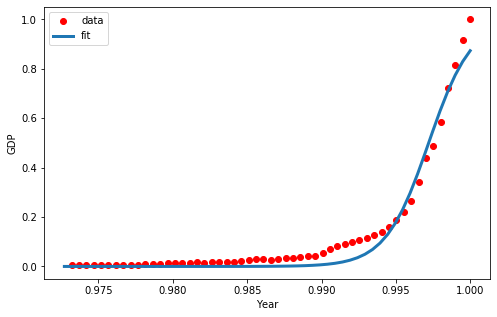

In [11]:
x = np.linspace(1960,2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_norm,y_norm,'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_norm, y)

0.030498418832325392

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_norm, y)

0.0015679266140117434

In [14]:
from sklearn.metrics import r2_score
r2_score(y_norm, y)

0.9726049983525928

In [15]:
#Membuat fungsi hitung MAE
#x disini adalah y atau nilai dari y asli
#y disini adalah y hasil prediksi
def mae(x,y):
    summation = 0 #variabel sigma
    n = len(y)
    
    for i in range (0,n):
        difference = x[i]-y[i]
        absolute = abs(difference)
        summation = summation + absolute
    
    summation = summation/n
    return summation


In [16]:
#Membuat fungsi hitung MSE
#x disini adalah y atau nilai dari y asli
#y disini adalah y hasil prediksi
def mse(x,y): 
    summation = 0 #variabel untuk menyimpan penjumlahan perbedaan (sigma)
    n = len(y) #banyaknya jumlah n atau item pada list
    
    for i in range (0,n):
        difference = x[i] - y [i] 
        squared_difference = difference**2 #pangkat duakan dari kedua variabel
        summation = summation + squared_difference #jumlah dari hasil perhitungan variabel
    
    summation = summation/n #banyaknya hasil perhitungan dibagi total nilai n
    return summation

In [17]:
#Membuat fungsi hitung R2
#x disini adalah y atau nilai dari y asli
#y disini adalah y hasil prediksi
def r2(x,y):
    summation = 0
    n = len(y)
    
    for i in range(0,n):
        difference_1 = x[i] - y[i]
        squared_difference_1 = difference_1**2
        summation_1 = summation + squared_difference_1 #cari niali sigma pertama
#         n_y = summation + y[i] 
#         avg = n_y/n
        avg = y[i]/n
        difference_2 = x[i] - avg
        squared_difference_2 = difference_2**2
        summation_2 = summation + squared_difference_2 #cari nilai sigma kedua
#         rse = 1 - summation_1/summation_2 #opsi 1
        rse = summation_1/summation_2 #opsi 2
    
#     summation = rse #opsi 1
    summation = 1- rse #opsi 2
    return summation 

In [18]:
n_mse = mse(y_norm, y)
print ("Nilai MSE adalah: ", n_mse)

Nilai MSE adalah:  0.0015679266140117432


In [19]:
n_mae = mae(y_norm,y)
print ("Nilai MAE adalah: ", n_mae)

Nilai MAE adalah:  0.030498418832325392


In [20]:
n_r2 = r2(y_norm, y)
print ("Nilai R2 adalah: ", n_r2)

Nilai R2 adalah:  0.9833637840852391


In [21]:
# sum = 0
# a = [1, 2, 3, 4] 
# l = len(y)
# for i in range(0, l): 
#     sum +=  y[i]
#     print(sum, end =" ") 
    


In [22]:
# print(l)  

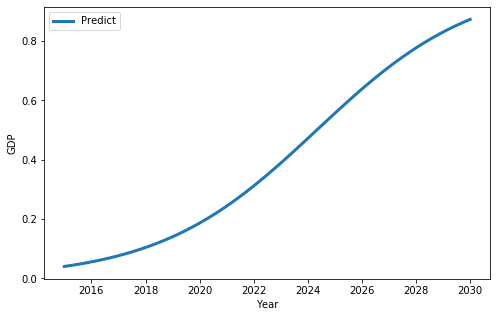

Data 
 [0.04017461 0.04398028 0.04812837 0.05264615 0.05756237 0.0629072
 0.06871212 0.07500983 0.08183402 0.08921918 0.09720027 0.10581235
 0.1150902  0.12506778 0.13577762 0.14725022 0.15951328 0.17259092
 0.18650281 0.20126331 0.21688056 0.23335561 0.25068155 0.26884278
 0.28781437 0.30756158 0.3280396  0.34919349 0.37095844 0.39326023
 0.41601608 0.43913567 0.46252248 0.48607538 0.50969029 0.53326203
 0.55668619 0.57986097 0.60268891 0.62507847 0.64694544 0.66821398
 0.68881757 0.70869946 0.72781301 0.74612171 0.76359889 0.78022732
 0.79599858 0.81091235 0.82497557 0.83820154 0.85060906 0.8622215
 0.87306599]


0.2654523797100489

In [23]:
#Prediksi Tahun 2015-2030
x = np.linspace(2015,2030, 55)
x2 = x
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
# plt.plot(x_norm,y_norm,'ro', label='data')
plt.plot(x2,y, linewidth=3.0, label='Predict')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()
print("Data \n", y)
# print("Data Asli", y_norm)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_norm, y)

In [24]:
# msk = np.random.rand(len(df)) < 0.8
# train_x = x_norm[msk]
# test_x = x_norm[~msk]
# train_y = y_norm[msk]
# test_y = y_norm[~msk]

# # build the model using train set
# popt, pcov = curve_fit(sigmoid, train_x, train_y)

# # predict using test set
# y_hat = sigmoid(test_x, *popt)

# plt.plot(test_x,y_hat, linewidth=3.0, label='Predict')
# plt.legend(loc='best')
# plt.ylabel('GDP')
# plt.xlabel('Year')
# plt.show()

# # evaluation
# print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
# from sklearn.metrics import r2_score
# print("R2-score: %.2f" % r2_score(y_hat , test_y) )